# ✈️ MSML 610 – Airport Congestion Project  
## Notebook 1: Exploratory Data Analysis (EDA)

This section performs an exploratory analysis of the **Airline On-Time Performance Dataset** (Kaggle).

We examine:
- `flights.csv`
- `airports.csv`
- `airlines.csv`

to understand data quality, missing values, distributions, and flight patterns.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

plt.style.use("seaborn-v0_8")

In [4]:
from pathlib import Path
import os

ROOT = Path.cwd().parents[0]
RAW = ROOT / "data" / "raw"

flights = pd.read_csv(RAW / "flights.csv", low_memory=False)
airports = pd.read_csv(RAW / "airports.csv")
airlines = pd.read_csv(RAW / "airlines.csv")

flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(f"Flights shape: {flights.shape}")
print(f"Airports shape: {airports.shape}")
print(f"Airlines shape: {airlines.shape}")

Flights shape: (5819079, 31)
Airports shape: (322, 7)
Airlines shape: (14, 2)


## Flights Dataset — Column Overview
This shows datatypes and missing data patterns.

In [7]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

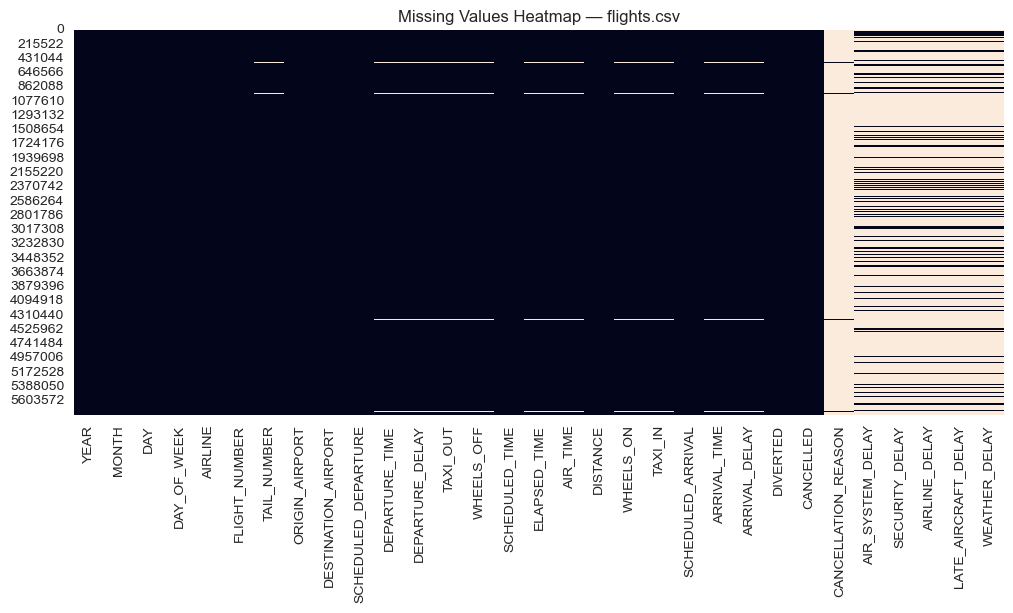

In [8]:
plt.figure(figsize=(12,5))
sns.heatmap(flights.isnull(), cbar=False)
plt.title("Missing Values Heatmap — flights.csv")
plt.show()

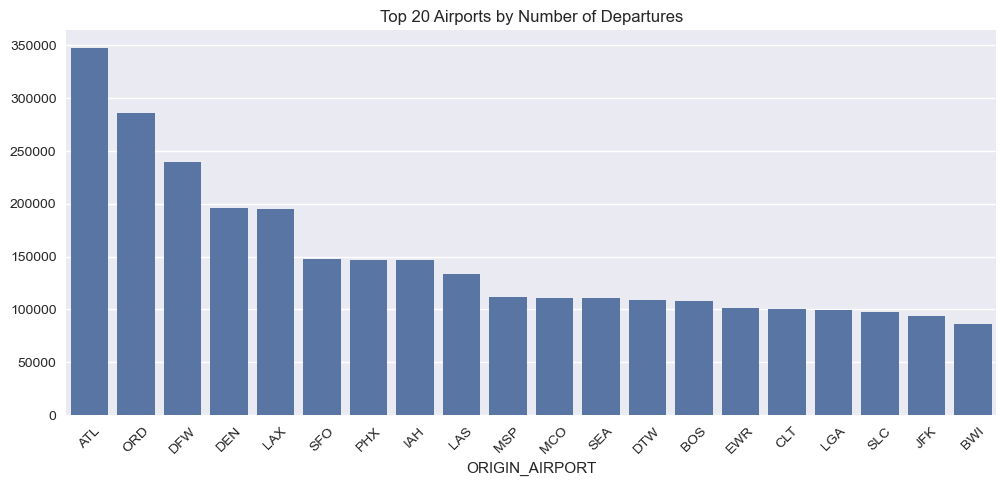

In [9]:
top_airports = flights["ORIGIN_AIRPORT"].value_counts().head(20)

plt.figure(figsize=(12,5))
sns.barplot(x=top_airports.index, y=top_airports.values)
plt.xticks(rotation=45)
plt.title("Top 20 Airports by Number of Departures")
plt.show()

## Convert HHMM time format into hour (0–23)

In [11]:
def hhmm_to_hour(x):
    try:
        x = int(x)
        return x // 100
    except:
        return np.nan

flights["DEP_HOUR"] = flights["SCHEDULED_DEPARTURE"].apply(hhmm_to_hour)
flights["ARR_HOUR"] = flights["SCHEDULED_ARRIVAL"].apply(hhmm_to_hour)

flights[["SCHEDULED_DEPARTURE", "DEP_HOUR", "SCHEDULED_ARRIVAL", "ARR_HOUR"]].head()

,SCHEDULED_DEPARTURE,DEP_HOUR,SCHEDULED_ARRIVAL,ARR_HOUR
0,5,0,430,4
1,10,0,750,7
2,20,0,806,8
3,20,0,805,8
4,25,0,320,3


## Daily Flight Volume
We construct a proper date column to analyze flight counts over time.

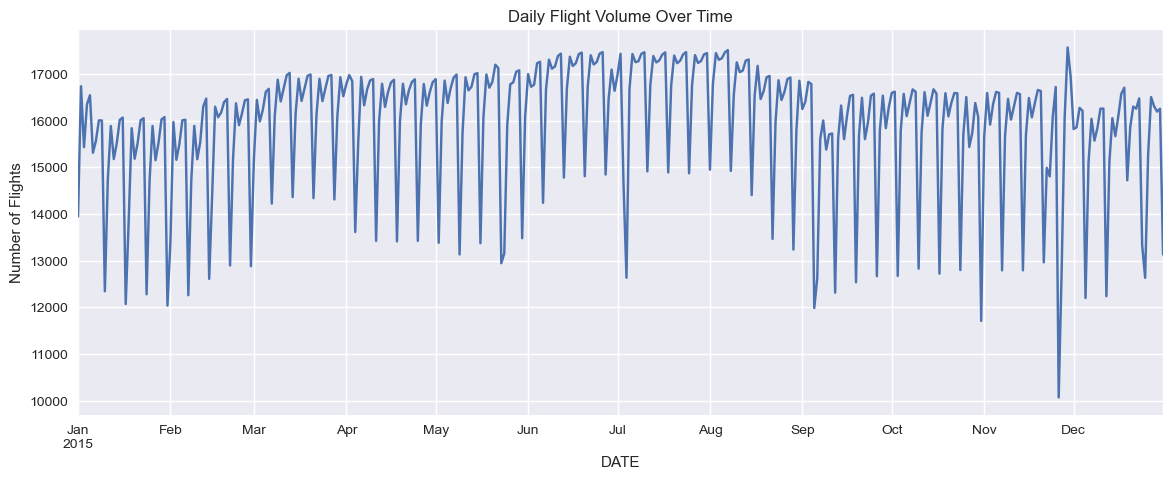

In [13]:
flights["DATE"] = pd.to_datetime(flights[["YEAR","MONTH","DAY"]])
daily = flights.groupby("DATE").size()

plt.figure(figsize=(14,5))
daily.plot()
plt.title("Daily Flight Volume Over Time")
plt.ylabel("Number of Flights")
plt.show()

## Delay Analysis
Departure and arrival delays are important predictors of congestion.

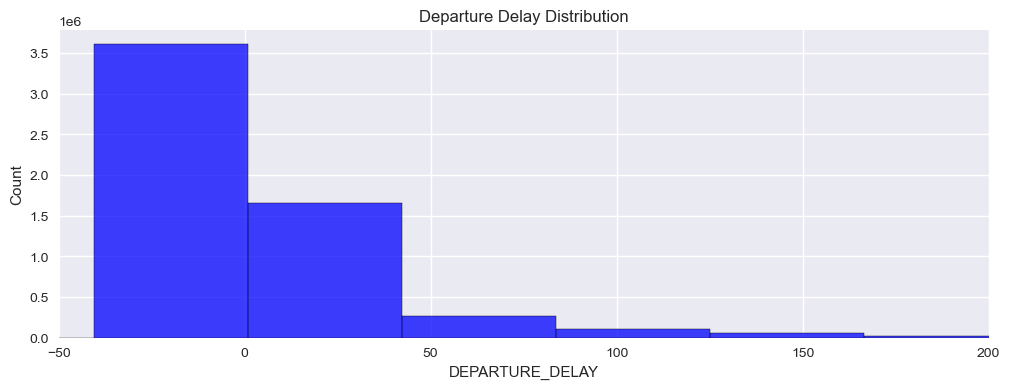

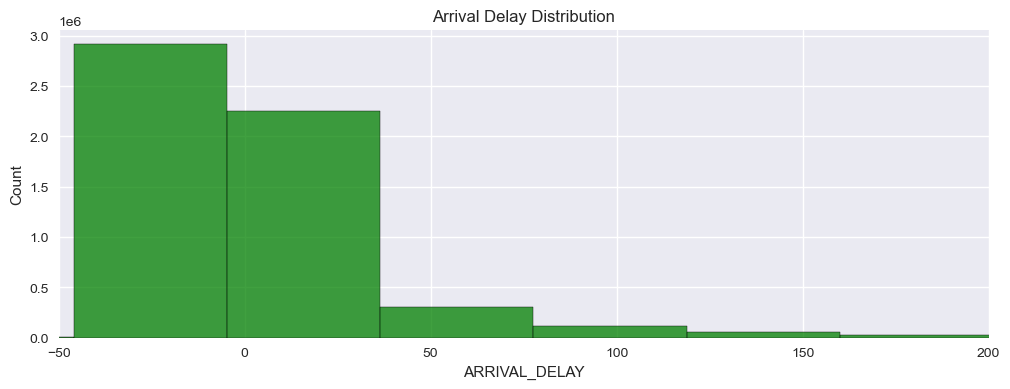

In [15]:
plt.figure(figsize=(12,4))
sns.histplot(flights["DEPARTURE_DELAY"], bins=50, kde=False, color="blue")
plt.title("Departure Delay Distribution")
plt.xlim(-50, 200)
plt.show()

plt.figure(figsize=(12,4))
sns.histplot(flights["ARRIVAL_DELAY"], bins=50, kde=False, color="green")
plt.title("Arrival Delay Distribution")
plt.xlim(-50, 200)
plt.show()

In [16]:
flights.describe().T

,count,mean,min,25%,50%,75%,max,std
YEAR,5819079.0,2015.0,2015.0,2015.0,2015.0,2015.0,2015.0,0.0
MONTH,5819079.0,6.524085,1.0,4.0,7.0,9.0,12.0,3.405137
DAY,5819079.0,15.704594,1.0,8.0,16.0,23.0,31.0,8.783425
DAY_OF_WEEK,5819079.0,3.926941,1.0,2.0,4.0,6.0,7.0,1.988845
FLIGHT_NUMBER,5819079.0,2173.092742,1.0,730.0,1690.0,3230.0,9855.0,1757.063999
SCHEDULED_DEPARTURE,5819079.0,1329.60247,1.0,917.0,1325.0,1730.0,2359.0,483.751821
DEPARTURE_TIME,5732926.0,1335.204439,1.0,921.0,1330.0,1740.0,2400.0,496.42326
DEPARTURE_DELAY,5732926.0,9.370158,-82.0,-5.0,-2.0,7.0,1988.0,37.080942
TAXI_OUT,5730032.0,16.071662,1.0,11.0,14.0,19.0,225.0,8.895574
WHEELS_OFF,5730032.0,1357.170841,1.0,935.0,1343.0,1754.0,2400.0,498.009356


## Airport Metadata Preview

We will use this later to enhance readability in the app.

In [18]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


# 🎉 EDA Complete

You may now proceed to: 


This sections creates the **hourly airport-level congestion dataset** from the raw flight logs.

### Key Outputs:
- Hourly departures  
- Hourly arrivals  
- Total hourly flights  
- Congestion labels (Low / Medium / High)

The output will be saved as: data/processed/hourly_congestion.csv

In [22]:
import pandas as pd
import numpy as np
from pathlib import Path

ROOT = Path.cwd().parents[0]
RAW = ROOT / "data" / "raw"
PROCESSED = ROOT / "data" / "processed"
PROCESSED.mkdir(parents=True, exist_ok=True)

RAW, PROCESSED

(PosixPath('/Users/varunparashar/src/umd_classes1/class_project/MSML610/Fall2025/Projects/UmdTask248_Fall2025_XGBoost_Airport_Congestion_Prediction/data/raw'),
 PosixPath('/Users/varunparashar/src/umd_classes1/class_project/MSML610/Fall2025/Projects/UmdTask248_Fall2025_XGBoost_Airport_Congestion_Prediction/data/processed'))

In [23]:
flights = pd.read_csv(RAW / "flights.csv", low_memory=False)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
## Convert HHMM times → Hour (0–23)

In [25]:
def hhmm_to_hour(x):
    try:
        x = int(x)
        return x // 100
    except:
        return None

flights["DEP_HOUR"] = flights["SCHEDULED_DEPARTURE"].apply(hhmm_to_hour)
flights["ARR_HOUR"] = flights["SCHEDULED_ARRIVAL"].apply(hhmm_to_hour)

flights[["SCHEDULED_DEPARTURE", "DEP_HOUR", "SCHEDULED_ARRIVAL", "ARR_HOUR"]].head()

,SCHEDULED_DEPARTURE,DEP_HOUR,SCHEDULED_ARRIVAL,ARR_HOUR
0,5,0,430,4
1,10,0,750,7
2,20,0,806,8
3,20,0,805,8
4,25,0,320,3


In [26]:
## Create DATE column for grouping

In [27]:
flights["DATE"] = pd.to_datetime(flights[["YEAR","MONTH","DAY"]])
flights[["YEAR","MONTH","DAY","DATE"]].head()

,YEAR,MONTH,DAY,DATE
0,2015,1,1,2015-01-01
1,2015,1,1,2015-01-01
2,2015,1,1,2015-01-01
3,2015,1,1,2015-01-01
4,2015,1,1,2015-01-01


## Aggregate Hourly Departures & Arrivals
We compute:
- number of departures per airport-hour
- number of arrivals per airport-hour

In [29]:
# Departures
dep = (flights.groupby(["ORIGIN_AIRPORT","DATE","DEP_HOUR"])
       .size().reset_index(name="departures"))
dep.rename(columns={"ORIGIN_AIRPORT":"AIRPORT","DEP_HOUR":"HOUR"}, inplace=True)

# Arrivals
arr = (flights.groupby(["DESTINATION_AIRPORT","DATE","ARR_HOUR"])
       .size().reset_index(name="arrivals"))
arr.rename(columns={"DESTINATION_AIRPORT":"AIRPORT","ARR_HOUR":"HOUR"}, inplace=True)

dep.head(), arr.head()

(  AIRPORT       DATE  HOUR  departures
 0   10135 2015-10-01     6           3
 1   10135 2015-10-01    12           3
 2   10135 2015-10-01    16           1
 3   10135 2015-10-01    17           2
 4   10135 2015-10-02     6           3,
   AIRPORT       DATE  HOUR  arrivals
 0   10135 2015-10-01    11         2
 1   10135 2015-10-01    12         1
 2   10135 2015-10-01    15         1
 3   10135 2015-10-01    16         2
 4   10135 2015-10-01    21         1)

In [30]:
## Merge Departures + Arrivals

In [31]:
hourly = pd.merge(dep, arr, on=["AIRPORT","DATE","HOUR"], how="outer")
hourly.head()

,AIRPORT,DATE,HOUR,departures,arrivals
0,10135,2015-10-01,6,3.0,NaN
1,10135,2015-10-01,11,NaN,2.0
2,10135,2015-10-01,12,3.0,1.0
3,10135,2015-10-01,15,NaN,1.0
4,10135,2015-10-01,16,1.0,2.0


In [32]:
hourly["departures"] = hourly["departures"].fillna(0).astype(int)
hourly["arrivals"] = hourly["arrivals"].fillna(0).astype(int)
hourly["total_flights"] = hourly["departures"] + hourly["arrivals"]

hourly.head()

,AIRPORT,DATE,HOUR,departures,arrivals,total_flights
0,10135,2015-10-01,6,3,0,3
1,10135,2015-10-01,11,0,2,2
2,10135,2015-10-01,12,3,1,4
3,10135,2015-10-01,15,0,1,1
4,10135,2015-10-01,16,1,2,3


## Label Congestion Levels

We create 3 bins:

- **Low**: 0–20 flights  
- **Medium**: 21–50 flights  
- **High**: 51+ flights  

In [34]:
hourly["congestion_level"] = pd.cut(
    hourly["total_flights"],
    bins=[-1, 20, 50, hourly["total_flights"].max()+1],
    labels=["Low", "Medium", "High"]
)

hourly.head()

,AIRPORT,DATE,HOUR,departures,arrivals,total_flights,congestion_level
0,10135,2015-10-01,6,3,0,3,Low
1,10135,2015-10-01,11,0,2,2,Low
2,10135,2015-10-01,12,3,1,4,Low
3,10135,2015-10-01,15,0,1,1,Low
4,10135,2015-10-01,16,1,2,3,Low


In [35]:
## Save the processed dataset

In [36]:
output_path = PROCESSED / "hourly_congestion.csv"
hourly.to_csv(output_path, index=False)

output_path

PosixPath('/Users/varunparashar/src/umd_classes1/class_project/MSML610/Fall2025/Projects/UmdTask248_Fall2025_XGBoost_Airport_Congestion_Prediction/data/processed/hourly_congestion.csv')

# ✈️ MSML 610 – Airport Congestion Project  

This section trains an **XGBoost classifier** to predict congestion levels  
(**Low**, **Medium**, **High**) for each airport–hour observation.

The input dataset comes from:

data/processed/hourly_congestion.csv

Output model is saved as:

data/models/model.pkl

In [41]:
import pandas as pd
from pathlib import Path

import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

ROOT = Path.cwd().parents[0]
PROCESSED = ROOT / "data" / "processed"
MODELS = ROOT / "data" / "models"
MODELS.mkdir(parents=True, exist_ok=True)

PROCESSED, MODELS

(PosixPath('/Users/varunparashar/src/umd_classes1/class_project/MSML610/Fall2025/Projects/UmdTask248_Fall2025_XGBoost_Airport_Congestion_Prediction/data/processed'),
 PosixPath('/Users/varunparashar/src/umd_classes1/class_project/MSML610/Fall2025/Projects/UmdTask248_Fall2025_XGBoost_Airport_Congestion_Prediction/data/models'))

In [42]:
df = pd.read_csv(PROCESSED / "hourly_congestion.csv")
df.head()

,AIRPORT,DATE,HOUR,departures,arrivals,total_flights,congestion_level
0,10135,2015-10-01,6,3,0,3,Low
1,10135,2015-10-01,11,0,2,2,Low
2,10135,2015-10-01,12,3,1,4,Low
3,10135,2015-10-01,15,0,1,1,Low
4,10135,2015-10-01,16,1,2,3,Low


## Feature Selection

We will use the following predictors:

### **Numerical**
- `departures`
- `arrivals`
- `total_flights`
- `HOUR`

### **Categorical**
- `AIRPORT`

In [44]:
# Encode congestion_level into numeric classes
label_map = {"Low": 0, "Medium": 1, "High": 2}

df["label"] = df["congestion_level"].map(label_map)

# Drop rows with missing labels (if any)
df = df.dropna(subset=["label"])

numeric_features = ["departures", "arrivals", "total_flights", "HOUR"]
categorical_features = ["AIRPORT"]

df["AIRPORT"] = df["AIRPORT"].astype(str)

X = df[numeric_features + categorical_features]
y = df["label"].astype(int)

X.head(), y.head()

(   departures  arrivals  total_flights  HOUR AIRPORT
 0           3         0              3     6   10135
 1           0         2              2    11   10135
 2           3         1              4    12   10135
 3           0         1              1    15   10135
 4           1         2              3    16   10135,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: label, dtype: int64)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape

((1037767, 5), (259442, 5))

## Build XGBoost Training Pipeline

The pipeline includes:

1. **One-Hot Encoding** for `AIRPORT`
2. **Passthrough** numerical features
3. **XGBoost Classifier**

In [47]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(
        n_estimators=200,
        max_depth=5,
        learning_rate=0.1,
        random_state=42,
        eval_metric="mlogloss"
    ))
])

model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['departures', 'arrivals',
                                                   'total_flights', 'HOUR']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['AIRPORT'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               ea...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [48]:
print("[INFO] Training model...")
model.fit(X_train, y_train)
print("[SUCCESS] Training complete!")

[INFO] Training model...
[SUCCESS] Training complete!


In [49]:
preds = model.predict(X_test)

# Reverse map 0/1/2 → Low/Medium/High
rev_label_map = {0: "Low", 1: "Medium", 2: "High"}
pred_labels = [rev_label_map[p] for p in preds]
true_labels = [rev_label_map[t] for t in y_test]

print("=== Classification Report ===")
print(classification_report(true_labels, pred_labels))

=== Classification Report ===
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      8582
         Low       1.00      1.00      1.00    227204
      Medium       1.00      1.00      1.00     23656

    accuracy                           1.00    259442
   macro avg       1.00      1.00      1.00    259442
weighted avg       1.00      1.00      1.00    259442



In [50]:
## Save Trained Model (model.pkl)

In [51]:
model_path = MODELS / "model.pkl"
joblib.dump(model, model_path)

model_path

PosixPath('/Users/varunparashar/src/umd_classes1/class_project/MSML610/Fall2025/Projects/UmdTask248_Fall2025_XGBoost_Airport_Congestion_Prediction/data/models/model.pkl')

# 🎉 Model Training Completed

Your model is now ready to be used in the Streamlit app: